# AirBnB Listings in Los Angeles, CA
##### Data source: http://insideairbnb.com/get-the-data.html
##### Date compiled: May 8, 2020
## 1 - Data Cleaning

### Dependencies

In [1]:
from datetime import datetime
from uszipcode import SearchEngine

from scipy import stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# Settings
pd.options.display.max_columns = 200
pd.options.display.max_rows = 50000
sns.set()
search = SearchEngine(db_file_dir='/tmp/.uszipcode')

### Data

In [3]:
listings = pd.read_csv('data/listings.csv', low_memory=False)
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200508043406,2020-05-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,100%,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,Other Cities,Culver City,CA,90230,Los Angeles,"Culver City, CA",US,United States,33.98209,-118.38494,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$122.00,$904.00,"$2,851.00",$500.00,$240.00,3,$25.00,30,730,30,30,730,730,30.0,730.0,3 months ago,t,0,0,0,38,2020-05-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200508043406,2020-05-08,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,60%,33%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank,

In [4]:
listings.shape

(37048, 106)

### Drop text columns with high cardinality

In [5]:
# Filter for string columns
txt_cols = listings.select_dtypes(['object']).copy()
txt_cols.head(2)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/109,2020-05-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,https://a0.muscache.com/im/pictures/4321499/1d...,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,100%,0%,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,Other Cities,Culver City,CA,90230,Los Angeles,"Culver City, CA",US,United States,t,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$904.00,"$2,851.00",$500.00,$240.00,$25.00,3 months ago,t,2020-05-09,2011-08-15,2016-05-15,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f
1,https://www.airbnb.com/rooms/344,2020-05-08,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,https://a0.muscache.com/im/pictures/cc4b724d-d...,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,60%,33%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,Other Cities,Burbank,CA,91505,Los Angeles,"Burbank, CA",US,United States,t,House,Entire home/apt,Real Bed,"{Internet,Wifi,""Air conditioning"",Pool,Kitchen...",$168.00,NaN,NaN,$0.00,$100.00,$0.00,8 months ago,t,2020-05-08,2016-06-14,2019-10-19,f,NaN,NaN,t,f,flexible,f,f


***
##### There are a few numeric columns still mixed in here because they contain characters such as "\\$" and "%".
***

In [6]:
# Remove numeric columns from `txt_cols`
to_drop = ['host_response_rate', 'host_acceptance_rate', 'price', 'weekly_price', 
           'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
txt_cols.drop(to_drop, axis=1, inplace=True)
txt_cols.head(2)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/109,2020-05-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,https://a0.muscache.com/im/pictures/4321499/1d...,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,within a day,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,Other Cities,Culver City,CA,90230,Los Angeles,"Culver City, CA",US,United States,t,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",3 months ago,t,2020-05-09,2011-08-15,2016-05-15,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f
1,https://www.airbnb.com/rooms/344,2020-05-08,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,https://a0.muscache.com/im/pictures/cc4b724d-d...,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,Other Cities,Burbank,CA,91505,Los Angeles,"Burbank, CA",US,United States,t,House,Entire home/apt,Real Bed,"{Internet,Wifi,""Air conditioning"",Pool,Kitchen...",8 months ago,t,2020-05-08,2016-06-14,2019-10-19,f,NaN,NaN,t,f,flexible,f,f


In [7]:
# Filter for columns with more than 50 unique values or only 1 unique value (constant variables provide no information)
cardinality = txt_cols.nunique()
to_drop_2 = txt_cols.columns[(cardinality == 1) | (cardinality > 50)].tolist()
to_drop_2

['listing_url',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'zipcode',
 'smart_location',
 'country_code',
 'country',
 'amenities',
 'calendar_updated',
 'has_availability',
 'first_review',
 'last_review',
 'license',
 'is_business_travel_ready']

***
##### Despite having high cardinality, a few of these columns may contain useful information so we will not be dropping the following:
- Host variables - `host_since`, `host_neighbourhood`, `host_verifications`
- Location variables - `neighbourhood_cleansed`, `zipcode`
- Review variables - `first_review`, `last_review`
***

In [8]:
# Remove `neighbourhood_cleansed` and `zipcode` from to_drop_2
to_remove = ['host_since', 'host_neighbourhood', 'host_verifications', 
             'neighbourhood_cleansed', 'zipcode', 'first_review', 'last_review']
for col in to_remove:
    to_drop_2.remove(col)

# Drop these columns from the main data
listings.drop(to_drop_2, axis=1, inplace=True)
listings.head(2)

,id,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,zipcode,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,20200508043406,2020-05-09,NaN,NaN,NaN,521,2008-06-27,within a day,100%,0%,f,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Culver City,Other Cities,CA,90230,Los Angeles,33.98209,-118.38494,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,NaN,$122.00,$904.00,"$2,851.00",$500.00,$240.00,3,$25.00,30,730,30,30,730,730,30.0,730.0,0,0,0,38,2020-05-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,"{""Culver City"","" CA""}",f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,20200508043406,2020-05-08,NaN,NaN,NaN,767,2008-07-11,within a day,60%,33%,f,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,Burbank,Other Cities,CA,91505,Los Angeles,34.16562,-118.33458,t,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,NaN,$168.00,NaN,NaN,$0.00,$100.00,6,$0.00,2,14,2,2,14,14,2.0,14.0,0,1,6,97,2020-05-08,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,t,flexible,f,f,1,1,0,0,0.17


In [9]:
listings.shape

(37048, 76)

***
##### 30 columns were dropped. A lot of the remaining columns contain information that is irrelevant to this analysis.
***

### Drop columns that will not be used

In [10]:
to_drop_3 = ['scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_id', 
             'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
             'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 
             'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'state', 
             'market', 'is_location_exact', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
             'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
             'maximum_nights_avg_ntm', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names', 
             'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
             'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
listings.drop(to_drop_3, axis=1, inplace=True)
listings.head(2)

,id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,109,f,Culver City,90230,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,NaN,$122.00,$904.00,"$2,851.00",$500.00,$240.00,3,$25.00,30,0,0,0,38,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,t,f,0.02
1,344,f,Burbank,91505,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,NaN,$168.00,NaN,NaN,$0.00,$100.00,6,$0.00,2,0,1,6,97,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,flexible,f,f,0.17


In [11]:
# Drop columns with more than half of the values missing
to_drop_4 = listings.columns[listings.isnull().mean() > 0.5].tolist()
listings.drop(to_drop_4, axis=1, inplace=True)
listings.shape

(37048, 39)

***
##### Another 37 columns were dropped. There are many columns that can be converted to another type for ease of use:
- There are several boolean columns (i.e. columns with only 2 values: "t" and "f"), which can be converted to numeric type (binary).
- A few numeric columns were recorded as strings because they contain characters like "\\$". With these characters removed, these columns can be converted to numeric type as well.
- Two date columns are casted as string type but would be easier to work with as a datetime.
- The `host_verifications` column contains lists, which are not usable as lists so we will extract the length of each list into a new variable. In other words, this new variable would describe the number of verifications the host completed.
***

### Recast columns

In [12]:
# Convert boolean columns to numeric type
bool_cols = ['host_is_superhost', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
bool_map = {'f': 0, 't': 1}
for col in bool_cols:
    listings[col] = listings[col].map(bool_map)
listings.head(2)

,id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,109,0.0,Culver City,90230,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,$122.00,$500.00,$240.00,3,$25.00,30,0,0,0,38,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0,strict_14_with_grace_period,1,0,0.02
1,344,0.0,Burbank,91505,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,$168.00,$0.00,$100.00,6,$0.00,2,0,1,6,97,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,flexible,0,0,0.17


In [13]:
# Convert string columns with numeric values to numeric type
str_cols = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in str_cols:
    listings[col] = listings[col].str.strip('$').str.replace(',', '').astype(float)
listings.head(2)

,id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,109,0.0,Culver City,90230,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,122.0,500.0,240.0,3,25.0,30,0,0,0,38,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0,strict_14_with_grace_period,1,0,0.02
1,344,0.0,Burbank,91505,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,168.0,0.0,100.0,6,0.0,2,0,1,6,97,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,flexible,0,0,0.17


In [14]:
# Convert date columns to datetime type
date_cols = ['first_review', 'last_review']
for col in date_cols:
    listings[col] = pd.to_datetime(listings[col])
listings.head(2)

,id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,109,0.0,Culver City,90230,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,122.0,500.0,240.0,3,25.0,30,0,0,0,38,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0,strict_14_with_grace_period,1,0,0.02
1,344,0.0,Burbank,91505,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,168.0,0.0,100.0,6,0.0,2,0,1,6,97,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,flexible,0,0,0.17


### Missing data

In [15]:
missing = pd.DataFrame(listings.isnull().sum(), columns=['num_missing'])
missing['pct_missing'] = np.round(listings.isnull().mean(), 2)
missing[missing.num_missing > 0]

,num_missing,pct_missing
host_is_superhost,5,0.00
zipcode,328,0.01
bathrooms,35,0.00
bedrooms,106,0.00
beds,381,0.01
bed_type,10,0.00
security_deposit,8933,0.24
cleaning_fee,4968,0.13
first_review,7635,0.21
last_review,7635,0.21


***
##### Missing values:
- `host_is_superhost` - these 5 listings are likely by hosts who do not have a profile, these will be dropped since there are only 5
- `zipcode` - since we have the `latitude` and `longitude`, we can use these to find the missing zip codes
- `bathroom`, `bedroom`, `beds`, `bed_type` - all missing an insignificant amount of values, these can be filled based on the most similar listings
- `security_deposit`, `cleaning_fee` - since these were not filled out for the listing, we are going to make the assumption that there is no fee so these will be filled with 0
- `first_review`, `last_review`, `reviews_per_month` - the data here is missing because these listings have 0 `number_of_reviews` so there is no data, `reviews_per_month` will be filled with 0 and the other 2 will be filled with the last date of the dataset (arbitrary choice)
- `review_scores_rating`, `review_scores_accuracy`, `review_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_value` - since these variables are ordinal in nature, filling as much as ~20% of the data with arbitary values like 0 or -1 may be misleading later on, these will be left as null for now
***

In [16]:
# Drop rows missing `host_is_superhost`
listings.dropna(subset=['host_is_superhost'], inplace=True)
listings.shape

(37043, 39)

In [17]:
listings.shape

(37043, 39)

In [18]:
# Fill `security_deposit`, `cleaning_fee`, and `reviews_per_month` with 0
for col in ['security_deposit', 'cleaning_fee', 'reviews_per_month']:
    listings[col].fillna(0, inplace=True)
listings[['security_deposit', 'cleaning_fee', 'reviews_per_month']].isnull().mean()

security_deposit     0.0
cleaning_fee         0.0
reviews_per_month    0.0
dtype: float64

In [19]:
# Fill `first_review` and `last_review` with May 8, 2020
for col in ['first_review', 'last_review']:
    listings[col].fillna(datetime(2020, 5, 8), inplace=True)
listings[['first_review', 'last_review']].isnull().mean()

first_review    0.0
last_review     0.0
dtype: float64

### Missing zip codes

In [20]:
listings.zipcode.unique()

array(['90230', '91505', '90046', '90405', '90706', '90066', '91367',
       '90039', '90291', '90802', '90277', '90019', '90247', '90068',
       '90036', '90501', '91607', '90026', '91208', '90042', '90065',
       '90232', '90025', '90004', '90027', '90012', '90265', '90401',
       '90505', '90034', '91604', '90038', '91405', '90262', '90029',
       '91344', '91206', '90212', '90211', '90006', '90403', '90069',
       '90016', '90035', '90064', '91316', '90715', '90056', '91343',
       '91042', '90045', '91364', '90402', '90010', '90745', '90814',
       '91601', '91001', '91302', '90290', '91352', '91606', '90266',
       '90275', '90803', '90292', '90018', '90404', '90712', '90020',
       '90732', '91001-2243', '91205', '90805', '91301', '91024', '90210',
       '90028', '90048', '91104', '91390', '91202', '90272', '90254',
       '90807', '90220', '91506', '91406', '90008', '90061', '90043',
       '90245', '90302', '91403', '90005', '91724', '91107', '91748',
       '91030',

***
##### A lot of these zip codes are formatted differently, but for the most part have 5 digits. Before dealing with the missing values, we will be standardizing these values to the 5-digit format to simplify it.
- Some are using the 9-digit format
- Some contain "CA" before it
- 1 contains an entire address
- 1 contains a note to the guests
- 10019, 10001, 9002, 0000 - not LA zip codes, hosts likely entered their house number in the zip code field
***

In [21]:
# Replace the wrong zip codes with null
wrong_zip_idx = listings[listings.zipcode.isin(['10019', '10001', '9002', '0000'])].index
for i in wrong_zip_idx:
    listings.loc[i, 'zipcode'] = np.NaN
listings.loc[wrong_zip_idx]

,id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
13008,20183694,0.0,South Park,NaN,33.99191,-118.27751,Condominium,Entire home/apt,5,1.0,1.0,1.0,Real Bed,349.0,0.0,0.0,1,0.0,1,28,58,88,363,0,0,2020-05-08,2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,0.00
22598,31195610,0.0,Rosemead,NaN,34.04052,-118.08261,Villa,Private room,2,1.0,1.0,2.0,Real Bed,55.0,0.0,20.0,1,0.0,5,0,0,0,0,19,6,2019-01-27,2019-06-17,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,1.22
31711,40180838,0.0,Adams-Normandie,NaN,34.02980,-118.30196,Condominium,Entire home/apt,3,1.0,1.0,1.0,Real Bed,275.0,1500.0,100.0,1,0.0,30,28,58,88,178,0,0,2020-05-08,2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,0,0,0.00
34144,41792639,0.0,Echo Park,NaN,34.06984,-118.24833,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,200.0,85.0,1,0.0,1,23,44,72,225,0,0,2020-05-08,2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,0,0,0.00


In [22]:
# Replace the address value with the correct zip code
address_zip_idx = listings[listings.zipcode == '139 S Valencia Ave, Glendora. 91741'].index
listings.loc[address_zip_idx[0], 'zipcode'] = '91741'
listings.loc[address_zip_idx]

,id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
20574,28917093,0.0,Glendora,91741,34.13434,-117.87759,Villa,Private room,2,1.0,1.0,1.0,Real Bed,26.0,200.0,8.0,1,8.0,1,8,38,68,68,12,9,2018-12-10,2020-02-02,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,0.7


In [23]:
# Remove `CA` from zip codes
listings['zipcode'] = listings.zipcode.str.strip('CA ')

# Remove everything beyond the first 5 digits from zip codes
listings['zipcode'] = listings.zipcode.str[:5]

listings.zipcode.unique()

array(['90230', '91505', '90046', '90405', '90706', '90066', '91367',
       '90039', '90291', '90802', '90277', '90019', '90247', '90068',
       '90036', '90501', '91607', '90026', '91208', '90042', '90065',
       '90232', '90025', '90004', '90027', '90012', '90265', '90401',
       '90505', '90034', '91604', '90038', '91405', '90262', '90029',
       '91344', '91206', '90212', '90211', '90006', '90403', '90069',
       '90016', '90035', '90064', '91316', '90715', '90056', '91343',
       '91042', '90045', '91364', '90402', '90010', '90745', '90814',
       '91601', '91001', '91302', '90290', '91352', '91606', '90266',
       '90275', '90803', '90292', '90018', '90404', '90712', '90020',
       '90732', '91205', '90805', '91301', '91024', '90210', '90028',
       '90048', '91104', '91390', '91202', '90272', '90254', '90807',
       '90220', '91506', '91406', '90008', '90061', '90043', '90245',
       '90302', '91403', '90005', '91724', '91107', '91748', '91030',
       '90014', '916

In [24]:
# Get the indices of listings with a missing zip code
missing_zip_idx = listings[listings.zipcode.isnull()].index

# Use the latitude and longitude of each listing to fill in the zip code
for i in missing_zip_idx:
    zc = search.by_coordinates(listings.loc[i, 'latitude'], listings.loc[i, 'longitude'], returns=1)[0].zipcode
    listings.loc[i, 'zipcode'] = zc
    
listings.zipcode.isnull().sum()

0

### Missing room values

In [25]:
listings.isnull().sum()[listings.isnull().sum() > 0][:4]

bathrooms     35
bedrooms     106
beds         381
bed_type      10
dtype: int64

In [26]:
# The only categorical variable here
listings.bed_type.value_counts()

Real Bed         36692
Futon              137
Pull-out Sofa       83
Airbed              67
Couch               54
Name: bed_type, dtype: int64

In [27]:
room_vars = ['bathrooms', 'bedrooms', 'beds']
lines = []
for c in room_vars:
    print(f'x=accommodates | y={c}')
    line = stats.linregress(listings.dropna(subset=[c])['accommodates'], listings.dropna(subset=[c])[c])
    lines.append(line)
    print(line, '\n')

x=accommodates | y=bathrooms
LinregressResult(slope=0.22551295926234477, intercept=0.6527376753232094, rvalue=0.5978757347998955, pvalue=0.0, stderr=0.0015717234942161714) 

x=accommodates | y=bedrooms
LinregressResult(slope=0.32864823112879593, intercept=0.24492148552132997, rvalue=0.7764280038758165, pvalue=0.0, stderr=0.0013880130971809933) 

x=accommodates | y=beds
LinregressResult(slope=0.4794961686195473, intercept=0.21494536898198202, rvalue=0.7684631207314037, pvalue=0.0, stderr=0.0020853260685403173) 



***
##### The only categorical variable here is `bed_type` and more than 99% of its values are the same, making it a quasi-constant variable. We will be dropping this variable since it does not provide much information in terms of variance among the listings. The other three numeric variables - `bathrooms`, `bedrooms`, and `beds` - have a strong correlation with the `accommodates` variable (as seen from the r-values in the cell above) so we will be filling the missing values in these columns based on this variable.
***

In [28]:
# Drop `bed_type`
listings.drop('bed_type', axis=1, inplace=True)

# Use regression lines to fill missing values
for i in range(3):
    v = room_vars[i]
    m, b = lines[i].slope, lines[i].intercept
    listings[v].fillna(np.round(listings['accommodates'] * m + b), inplace=True)
    
listings.isnull().sum()[listings.isnull().sum() > 0]

review_scores_rating           8083
review_scores_accuracy         8131
review_scores_cleanliness      8130
review_scores_checkin          8143
review_scores_communication    8132
review_scores_location         8147
review_scores_value            8151
dtype: int64

***
##### Again, the missing reviews will be left as null for now as there is no meaningful way of guessing 20% of the data without introducing a heavy bias. That takes care of all of the missing data.
***

### Outliers

In [29]:
listings.describe()

,id,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
count,3.704300e+04,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,37043.000000,28960.000000,28912.000000,28913.000000,28900.000000,28911.000000,28896.000000,28892.000000,37043.000000,37043.00000,37043.000000,37043.000000
mean,2.519432e+07,0.324542,34.050419,-118.318039,3.645844,1.474935,1.443539,1.963529,227.919499,372.458548,83.827417,1.917285,14.992657,12.714575,15.151365,32.807980,51.009988,168.055854,35.204681,11.779823,94.271823,9.610127,9.418255,9.745260,9.714607,9.707330,9.429704,0.432119,0.01312,0.020625,1.274716
std,1.278065e+07,0.468210,0.121141,0.165574,2.689374,1.014207,1.137735,1.674724,685.204600,2231.763462,100.029357,1.770882,26.905929,26.760516,13.329907,25.844272,38.192819,142.794635,64.280323,18.411837,9.111220,0.897796,1.012017,0.786372,0.838667,0.730752,0.943934,0.495377,0.11379,0.142126,1.689699
min,1.090000e+02,0.000000,33.338830,-118.934220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000
25%,1.519335e+07,0.000000,33.998345,-118.422305,2.000000,1.000000,1.000000,1.000000,69.000000,0.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,93.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,0.00000,0.000000,0.060000
50%,2.629844e+07,0.000000,34.061460,-118.342660,3.000000,1.000000,1.000000,1.000000,109.000000,100.000000,60.000000,1.000000,5.000000,3.000000,18.000000,39.000000,66.000000,153.000000,8.000000,3.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.00000,0.000000,0.540000
75%,3.684889e+07,1.000000,34.104180,-118.250900,4.000000,2.000000,2.000000,2.000000,185.000000,300.000000,109.000000,2.000000,20.000000,30.000000,29.000000,59.000000,89.000000,336.000000,40.000000,16.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.00000,0.000000,1.920000
max,4.338380e+07,1.000000,34.811190,-117.652640,24.000000,16.000000,13.000000,50.000000,25000.000000,250000.000000,2500.000000,24.000000,300.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,822.000000,211.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,1.000000,17.230000


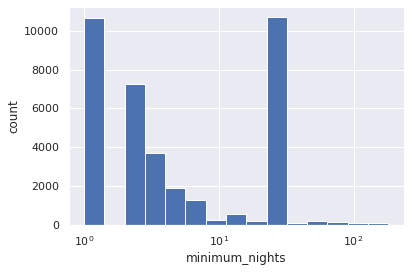

In [30]:
listings.minimum_nights.hist(bins=2**np.arange(0, 8, 0.5))
plt.xscale('log')
plt.xlabel('minimum_nights')
plt.ylabel('count');

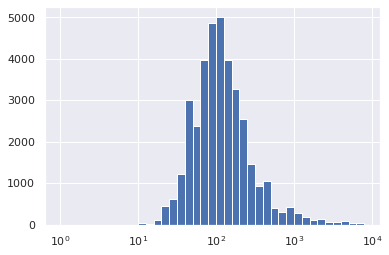

In [31]:
listings.price.hist(bins=10**np.arange(0, 4, 0.1))
plt.xscale('log');

In [32]:
# Define outlier threshold
iqr = listings.price.quantile(0.75) - listings.price.quantile(0.25)
thresh = int(5 * iqr + listings.price.quantile(0.75))

# Count outliers
num_gt1k = listings[listings.price > thresh].shape[0]
pct_gt1k = round(100 * num_gt1k / listings.shape[0], 2)
print(f'{num_gt1k} listings cost more than ${thresh} a night, which is {pct_gt1k}% of all listings in LA')

1465 listings cost more than $765 a night, which is 3.95% of all listings in LA


***
##### The maximum value for `minimum_nights` is as high as 1125, which is suspicious because that would be over 3 years. Even with a log-transformation, this variable is right-skewed with a large concentration at 30, which indicates monthly stays. To simplify this variable, we will be grouping the values into 3 bins:
- `minimum_nights` of 1 (represented by 1) - these listings have no restrictions on the number of nights stayed
- `minimum_nights` between 2 and 29 inclusive (represented by 15) - these listings do have a required minimum but are not monthly stays
- `minimum_nights` of at least 30 (represented by 30) - these listings are for monthly stays

##### The listing `price` is also highly right-skewed, but with a log-transformation, we can see that the `price` is normally distributed around 100. There are 1,465 listings that cost more than \\$765 a night, reaching as high as \\$25,000. Here, we are treating `price`s over \\$765 as outliers, calculated as 5 times the interquartile range (IQR) added to the 3rd quartile. The reason for using an IQR multiplier of 5 instead of the conventional 1.5 is to capture a lot of the listings in the more expensive areas that would have been cut off with a 1.5-multiplier. Most of the analysis will exclude these outliers, but they may be used later. Another issue with the `price` is the presence of 0s, which is not useful in this case so they will be dropped.
***

In [33]:
# Bin `minimum_nights`
listings['minimum_nights'] = listings['minimum_nights'].apply(lambda n: n if n == 1 else (30 if n >= 30 else 15))
listings.minimum_nights.value_counts().sort_index()

1     10648
15    15315
30    11080
Name: minimum_nights, dtype: int64

In [34]:
listings = listings[listings.price > 0]

In [35]:
listings.shape

(37028, 38)

### Save the dataframe

In [36]:
listings.to_pickle('data/listings_clean.pkl')
pd.read_pickle('data/listings_clean.pkl').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37028 entries, 0 to 37047
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                37028 non-null  int64         
 1   host_is_superhost                 37028 non-null  float64       
 2   neighbourhood_cleansed            37028 non-null  object        
 3   zipcode                           37028 non-null  object        
 4   latitude                          37028 non-null  float64       
 5   longitude                         37028 non-null  float64       
 6   property_type                     37028 non-null  object        
 7   room_type                         37028 non-null  object        
 8   accommodates                      37028 non-null  int64         
 9   bathrooms                         37028 non-null  float64       
 10  bedrooms                          37028 non-nu

In [37]:
listings.to_csv('data/listings_clean.csv')
pd.read_csv('data/listings_clean.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37028 entries, 0 to 37027
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        37028 non-null  int64  
 1   id                                37028 non-null  int64  
 2   host_is_superhost                 37028 non-null  float64
 3   neighbourhood_cleansed            37028 non-null  object 
 4   zipcode                           37028 non-null  int64  
 5   latitude                          37028 non-null  float64
 6   longitude                         37028 non-null  float64
 7   property_type                     37028 non-null  object 
 8   room_type                         37028 non-null  object 
 9   accommodates                      37028 non-null  int64  
 10  bathrooms                         37028 non-null  float64
 11  bedrooms                          37028 non-null  float64
 12  beds